In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Initializing Test Path

In [9]:
# Initialize test points for analysis
nodes = np.array([
        (0,1)
        ,(2,4)
        ,(6,10)
        ,(15,6)
])
# Interpolates X and Y values for a node and the following node to yeild one continuous line 
lines_x = [np.linspace(x0,x1) for (x0,x1) in zip(nodes[:-1,0], nodes[1:,0])]
lines_y = [np.linspace(y0,y1) for (y0,y1) in zip(nodes[:-1,1], nodes[1:,1])]

# Concatenates the X and Y lines and pairs them into points
path =  np.array(list(zip(np.array(lines_x).flatten(), np.array(lines_y).flatten())))
path[:5]

array([[0.        , 1.        ],
       [0.04081633, 1.06122449],
       [0.08163265, 1.12244898],
       [0.12244898, 1.18367347],
       [0.16326531, 1.24489796]])

### Creating a Grid

To determine the maximum x and y axis values of the grid, one is added to the largest x and y point value.

On this example, the grid is split into 5 segments on both the x and y axis. np.linspace is used to mark the segment intercept points for each axis of the grid

In [3]:
grid_dim = [max(nodes[:,0])+1, max(nodes[:,1])+1]
nboxes = 5
grid_x, grid_y = np.linspace(0, grid_dim[0],num=nboxes+1), np.linspace(0, grid_dim[1],num=nboxes+1)
print(grid_x, grid_y)

[ 0.   3.2  6.4  9.6 12.8 16. ] [ 0.   2.2  4.4  6.6  8.8 11. ]


### Visualizing the Path and Grid

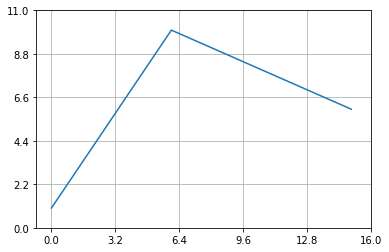

In [8]:
# Initialize the plot
fig, ax = plt.subplots()

# Plots each point in the path
ax.plot(path[:,0], path[:,1])

# Use the grid segments for the X and Y axis to determine the major axis ticks
ax.set_yticks(grid_y)
ax.set_xticks(grid_x)
ax.grid()

### Detecting if a Point Lies Within a Grid Box



In [ ]:

idx_range = list(range(1, nboxes+1))
idxs = list(itertools.product(idx_range,idx_range))

nbox_intercepted = 0
for xi,yi in idxs:
  x0,x1 = grid_x[xi-1], grid_x[xi]
  y0,y1 = grid_y[yi-1], grid_y[yi]

  inside_box = path[(path[:,0]>x0) & (path[:,0]<x1) & (path[:,1]>y0) & (path[:,1]<y1)]
  if len(inside_box) > 0:
      nbox_intercepted += 1
nbox_intercepted

11

In [ ]:
def count_intercepts(nboxes, path, grid_dim):
  grid_x, grid_y = np.linspace(0, grid_dim[0],num=nboxes+1), np.linspace(0, grid_dim[1],num=nboxes+1)

  idx_range = list(range(1, nboxes+1))
  idxs = list(itertools.product(idx_range,idx_range))

  nbox_intercepted = 0
  for xi,yi in idxs:
    x0,x1 = grid_x[xi-1], grid_x[xi]
    y0,y1 = grid_y[yi-1], grid_y[yi]

    inside_box = path[(path[:,0]>x0) & (path[:,0]<x1) & (path[:,1]>y0) & (path[:,1]<y1)]
    if len(inside_box) > 0:
        nbox_intercepted += 1
  return nbox_intercepted

In [ ]:
magnification = [2**n for n in range(1,8)]
scale_range = 20

N = [count_intercepts(s, path, grid_dim) for s in magnification]

x = [np.log(1/s) for s in magnification]
y = [np.log(n) for n in N]

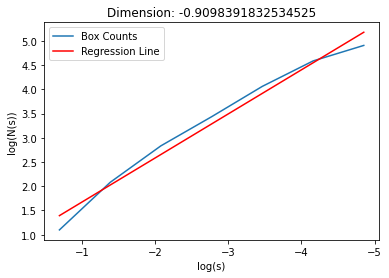

In [ ]:
X = np.array(x).reshape(-1, 1)
lr = LinearRegression(fit_intercept=True)
lr.fit(X,y)
lr.coef_

y_pred = lr.predict(X)

fig, ax = plt.subplots()
ax.plot(x,y, label='Box Counts')
ax.invert_xaxis()
ax.set_xlabel('log(s)')
ax.set_ylabel('log(N(s))');
ax.plot(X,y_pred,c='r', label='Regression Line')
dimension = lr.coef_
ax.set_title(f'Dimension: {dimension[0]}');
ax.legend();